__Imbalanced Data__

__Why it is necessary to handle Imbalance data__

In machine learning classification tasks, The problem with this imbalanced data is that models tend to favor the majority class, leading to poor performance in identifying minority classes. In such cases, the model prioritizes overall accuracy instead of accurately recognizing minority class instances.

__Example__

__Medical Dignosis__

Suppose diagnosis machine wants to detect rare diseases. Imbalanced data can lead to ML models that fail to identify patients with the disease

__Spam Detection__

Identifying spam emails from large amount of legitimate email. The large amount of legitimate email can lead to fail the model to detect email with spam. To avoid this thing we use some technique to balance the imabalanced data so that A balanced approach ensures spam emails are correctly identified and filtered.

__Fraud Detection__

Identifying fraudulent transactions among a large number of legitimate transactions. Same approch we apply for that

__Let's see how imbalanced data looks like__

Import the 'creditcard.csv' in which 'Class' column is target variable in which we have to detect the fraud detection where class 0 is non-fraudulent and class 1 is fraudulent

In [6]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [188]:
df.shape

(2000, 31)

In [190]:
class_distribution = df['Class'].value_counts()
class_distribution

Class
0    1974
1      26
Name: count, dtype: int64

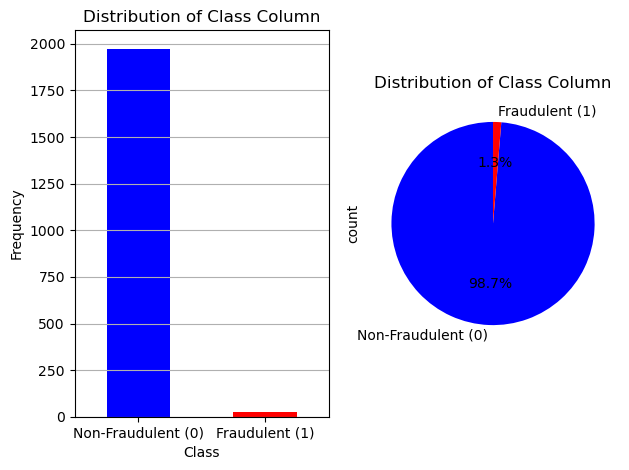

In [192]:
# Plot distribution of 'Class' column

import matplotlib.pyplot as plt
plt.subplot(1,2,1)
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class Column')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)
plt.grid(axis='y')

plt.subplot(1,2,2)
class_distribution.plot(kind='pie', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class Column')
plt.tight_layout()
plt.show()

__Technique to handle Imbalanced data__

1) Oversampling Techniques : In this we use SMOTE(Synthetic Minority Oversampling Techniques) which copy the minority so that minority class equal to majority class till data balanced. This technique also avoid the redundancy of instances. SMOTE also prevent overfitting
2) UnderSampling Technique :
3) Ensemble methods for Imbalanced data :

__SMOTE:__ is a more advanced method that generates new synthetic samples for the minority class. It works by

1) Selecting a random minority class sample.2) 
Finding its k-nearest neighbors (usually k=5.

.3) 
Choosing one of these neighbors and creating a synthetic sample along the line segment joining the original sample and the neighbor.

__Let's impliment SMOTE on above dataset__

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

In [10]:
x=df.drop('Class', axis=1)
y=df['Class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

scaler=StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [202]:
x_train_sc[:,0]

array([-0.59311634,  0.47278717,  1.41137339, ..., -1.07257853,
       -1.17859615,  1.26827468])

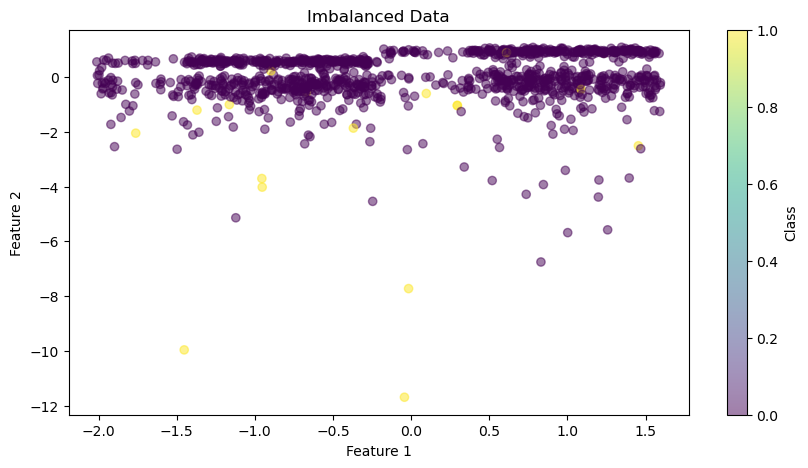

In [217]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train_sc[:, 0], x_train_sc[:, 1], c=y_train, alpha=0.5,  marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

There are predominantly purple points, indicating a majority of data points belong to the class close to 0.0. Yellow points, indicating data points with a class close to 1.0, are much fewer in comparison.

1) x_train_sc[:,0] : All row of first column of x_train_sc. These values will be plotted on the x-axis of the scatter plot
2) x_train_sc[:,1] : All row of second column of x_train_sc. These values will be plotted on the y-axis of the scatter plot
3) c=y_train : The c argument assigns colors to the points based on the values in y_train. Typically, this is used for categorical or numerical labels, and different colors represent different categories or value ranges.
4) alpha : Controls the transparency of the points. 0 is completely transparent, and 1 is fully opaque. Here, 0.5 means the points are semi-transparent.

In [220]:
len(x_train_sc[:,0])

1200

__Apply Oversampling technique SMOTE to balance the data__

In [235]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_sc, y_train)

plot balanced data scatter plot to compare with imbalanced data

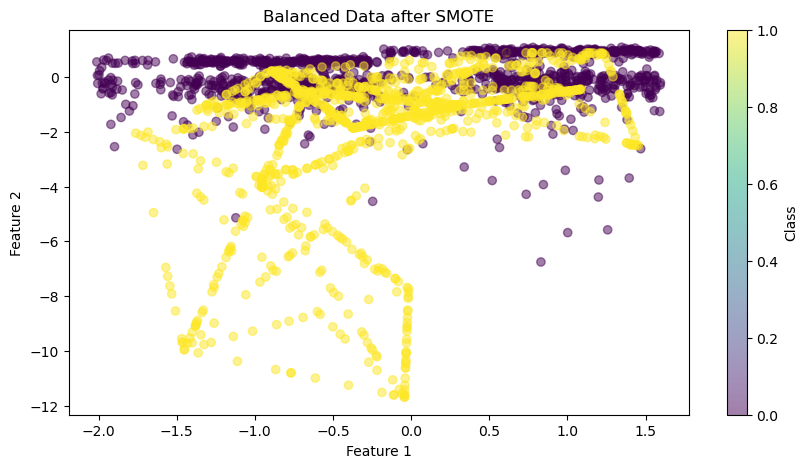

In [242]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train_smote[:, 0], x_train_smote[:, 1], c=y_train_smote, alpha=0.5,  marker='o')
plt.title('Balanced Data after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

Here we can see each yellow point class 1 which was in imbalanced data joined through a straight line with class 1 point so that data is balanced

In [266]:
len(x_train_sc[:,0])

1200

In [268]:
len(x_train_sc[:,1])

1200

In [272]:
len(x_train_smote[:,0])

2364

__Train and Evaluate Decision Tree Classifier on Oversampled data__

In [280]:
dt_model=DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [286]:
y_train_pred_dt=dt_model.predict(x_train_smote)
y_test_pred_dt=dt_model.predict(x_test_sc)

training_accuracy = accuracy_score(y_train_smote, y_train_pred_dt)
testing_accuracy = accuracy_score(y_test, y_test_pred_dt)

print('Decision Tree :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Decision Tree :
Training Accuracy : 0.9945008460236887
Testing Accuracy : 0.985


In [293]:
# cross validation
score = cross_val_score(dt_model, x_train_smote, y_train_smote, cv=5)
print('Cross Validation Scores :',score)
print('Mean Score :',score.mean())

Cross Validation Scores : [0.99154334 0.99154334 0.98942918 0.99154334 0.99364407]
Mean Score : 0.9915406528827893


we can see that model is more consistent on balanced data and generalized well 

Confusion Matrix :
[[780  12]
 [  0   8]]


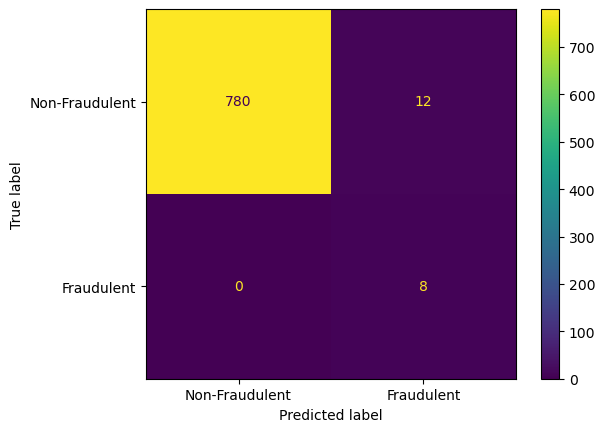

In [301]:
conf_mat=confusion_matrix(y_test, y_test_pred_dt)
print('Confusion Matrix :')
print(conf_mat)

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Non-Fraudulent', 'Fraudulent'])
cm_display.plot()
plt.show()

In [307]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       792
           1       0.40      1.00      0.57         8

    accuracy                           0.98       800
   macro avg       0.70      0.99      0.78       800
weighted avg       0.99      0.98      0.99       800



In [320]:
y_pred_prob_dt = dt_model.predict_proba(x_test_sc)[:,1]
result=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred_dt,
    'Predicted probability' : y_pred_prob_dt
})
result

,Actual,Predicted,Predicted probability
1860,0,0,0.00088
353,0,0,0.00088
1333,0,0,0.00088
905,0,0,0.00088
1289,0,0,0.00088
...,...,...,...
966,0,0,0.00088
461,0,0,0.00088
1302,0,0,0.00088
1176,0,0,0.00088


Optimal Threshold : 0.99146110056926


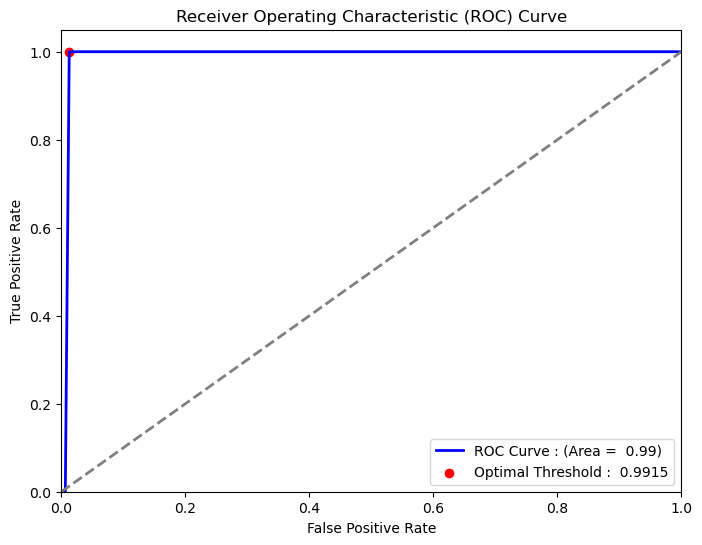

In [339]:
# Plot roc curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc=auc(fpr,tpr)
youden_j=tpr-fpr
optimal_threshold_index=np.argmax(youden_j)
optimal_threshold=thresholds[optimal_threshold_index]
print('Optimal Threshold :',optimal_threshold)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve : (Area = {roc_auc : .2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold : {optimal_threshold : .4f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

__Undersampling Technique__

We apply undersampling technique to when dataset is large. In this we reduce majority class equal to minority class. Note that we use this only when minority class data even sufficient in number that is if minority data too small and if we convert majority class into minority class then it may be misclassification. 

__Remark__

1) There is no rule that when we have to apply which one technique. First apply both technique oversampling and undersampling and see which gives the better result that will be final convertion technique.
2) Even after applying both these strategies and we don't see better result then we move for Ensemble method(Balanced Random Forest) for Imbalanced data.
3) In undersampling the technique we use is called Random Undersampling which removing instances won't result in significant information loss.

__Random Undersampling__

It is the simplest form of undersampling, where majority class samples are randomly removed to achieve balance.

__How Random Sampling work__

1) Identify majority and minority class
2) Randomly Remove Samples: Randomly select and remove samples from the majority class until the number of samples in each class is balanced. For example, if you have 1,000 samples in the majority class and 100 in the minority class, you might randomly remove 900 samples from the majority class.

__Advantage of Random Undersampling__

1) It is simple and easy to understand.
2) Reducing Training time : By reducing the number of samples, it can speed up the training process. so Undersampling technique is faster than Oversampling Technique

__Disadvantage of Random Undersampling__

1) Loss of Information : Removing samples from the majority class can lead to loss of important information.
2) Overfitting : The model might overfit to the remaining data, especially if the dataset is small.

__Let's impliment Undersampling Technique on 'creditcard.csv' data__

In [9]:
from imblearn.under_sampling import RandomUnderSampler
undersampler=RandomUnderSampler(random_state=42)
x_train_under, y_train_under = undersampler.fit_resample(x_train_sc, y_train)

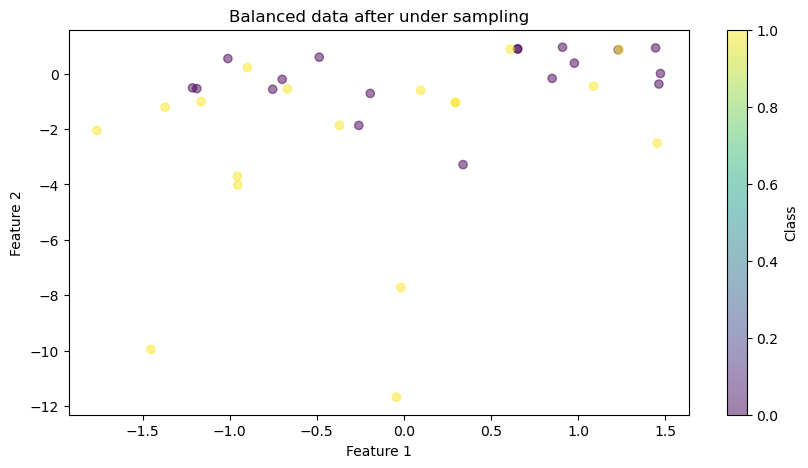

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(x_train_under[:,0], x_train_under[:,1], c=y_train_under, alpha=0.5, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Balanced data after under sampling')
plt.colorbar(label='Class')
plt.show()

We can see data is more balanced after applying Random Undersampling, but data is less

__Train and Evaluate Decision Tree Classifier__

1) Initialize and train decision tree classifier on undersampled training data
2) Predict on training and testing set and calculate accuracy score of traning and testing 

In [34]:
dt_model_under=DecisionTreeClassifier(random_state=42)
dt_model_under.fit(x_train_under, y_train_under)   # no effect of max_depth on accuracy score so i didnot use

DecisionTreeClassifier(random_state=42)

In [36]:
y_train_pred_dt=dt_model_under.predict(x_train_under)
y_test_pred_dt=dt_model_under.predict(x_test_sc)
training_accuracy=accuracy_score(y_train_under, y_train_pred_dt)
testing_accuracy=accuracy_score(y_test, y_test_pred_dt)
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Training Accuracy : 1.0
Testing Accuracy : 0.8075


Training accuracy is 1.0 means model learn and predict the 100% training data. but testing accuracy 0.81 means only 81% of test data predicted by model. so model is overfitted. 

we use k-fold cross validation technique to check the performance of model

We remember that stratifiedkfold cross validation use for imbalance dataset

In [95]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [97]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score=cross_val_score(pipeline, x_train, y_train, cv=cv, scoring='accuracy')
print('Cross validation score :',cv_score)
print('cv_mean :',cv_score.mean())

Cross validation score : [0.87916667 0.90416667 0.85833333 0.8625     0.85      ]
cv_mean : 0.8708333333333332


from scores we see that model is little bit inconsistentance or bias maybe due to loss of some information deue to undersampling

In [104]:
y_train_pred=pipeline.predict(x_train)
y_test_pred=pipeline.predict(x_test)
training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Training Accuracy : 0.8175
Testing Accuracy : 0.8075


Traning accuracy 0.82 and testing accuracy 0.81 means model lean and classify 82% on traning data and model classify 81% on unseen data. 0.01 small difference in accuracy means model generalize well without overfitting

Confusion Matrix :
[[638 154]
 [  0   8]]


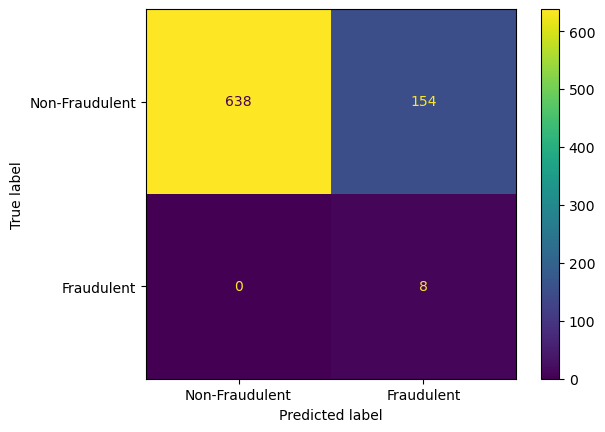

In [109]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Non-Fraudulent', 'Fraudulent'])
cm_display.plot()
plt.show()

In comparison of FN=638 The large amount(154) of non-fraudulent incorrectly predicted as fraudulent

In [113]:
y_pred_prob=pipeline.predict_proba(x_test)[:,1]
result=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred,
    'Predicted_prob' : y_pred_prob
})
result.head()

,Actual,Predicted,Predicted_prob
1860,0,0,0.0
353,0,0,0.0
1333,0,0,0.0
905,0,0,0.0
1289,0,0,0.0


__Note__

In situations where the dataset is highly imbalanced, the ROC curve can give an overly optimistic assessment of the model’s performance.

This optimism bias arises because the ROC curve’s false positive rate (FPR) can become very small when the number of actual negatives is large. As a result, even a large number of false positives would only lead to a small FPR, leading to a potentially high AUC that doesn’t reflect the practical reality of using the model.

Then comes __Precision-Recall curve and AUCPR(Area under precision-recall curve)__  which is especially useful when the positive class is rarer and more relevant.

Since in above confusion matrix we can see that FP=0 so FPR=0 also TP=8 which is small since ROC curve between FPR and TPR due to no value FPR we plot precision-recall curve

Precision : [0.01       0.04938272 1.        ]
Recall : [1. 1. 0.]
Area under the Precision-Recall Curve(AUCPR):  0.049


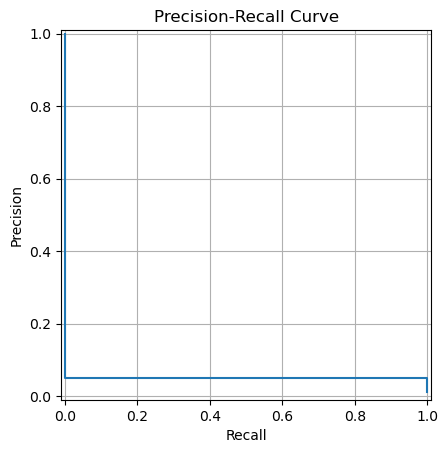

In [149]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
print('Precision :',precision)
print('Recall :',recall)
aucpr = average_precision_score(y_test, y_pred_prob)
print(f'Area under the Precision-Recall Curve(AUCPR): {aucpr : .3f}')
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

__Observation__

1) The curve starts with a high precision value of 1.0 when recall is near zero. This indicates that at the very low threshold settings, where the model predicts only the most confidently positive samples as positive, it does so correctly.
2) 
As recall increases slightly, the precision drops sharply to a low value (close to 0.2) and remains nearly constant across the rest of the recall range. This is a characteristic of a model that, after a certain point, begins to classify more and more negative samples as positive, thus drastically reducing precisiocall

3) The nearly flat and low precision across most of the recall range suggests that the model struggles to discriminate between positive and negative classes effectively as it attempts to increase recall

4) we see that when Recall is 1 the precision decresses from 0.1 to 0 and when Precision is 1 Recall equal to 0

When are precision and recall useful?

1) When a dataset is imbalanced
2) When evaluating the performance of a model for a specific application

How are precision and recall related?

- There is a trade-off between precision and recall. Increasing one metric will usually decrease the other

__Remark__

precision(TP/(TP+FP)) tells you how accurate the model's positive predictions are (i.e., how often it correctly identifies a positive instance when it predicts positive)i.e. when it predicts positive class how many correctly identified positive instances.

Recall(TP/(TP+FN)) tells you how well the model captures all actual positive instances (i.e., how many true positives it identifies out of all the actual positive cases) 

The relation between F1 score(harmonic mean of precision and recall) and specificity(TN/(TN+FP)) as there is a trade-off between F1 score and specificity. Increasing one metric will usually decrease the other

__Ensemble method for Imbalanced data__

__Balanced Random Forest(BRF):__

BRF is an ensemble method designed to handle imbalance in classification task. it is modified version of standard random forest algorithm to address the imbalance data by combining random undersampling of the majority class. BRF classifier works by performing undersampling on the majority class.

__How BRF works__

- Sampling: Instead of using entire majority class. BRF randomly samples of majority class that is equal in size of minority class. This creates balance subset of data for training each tree.
- Tree Construction: Each tree in the forest is built using a different balanced subset of data. Decision tree trained on balanced subset
- Ensemble Learning: Final model is an ensemble of trees. Final prediction is made by averaging the prediction of all trees(in case of regression) or by majority vote(in case of classification)

__Advantages:__

- Reduce overfitting & Reduce Bias
- Enhance performance & robustness of model by combining multiple tree

In [79]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf_classifier=BalancedRandomForestClassifier(sampling_strategy='all', replacement=True, bootstrap=False, random_state=42)
brf_classifier.fit(x_train_sc, y_train)

BalancedRandomForestClassifier(bootstrap=False, random_state=42,
                               replacement=True, sampling_strategy='all')

__Remark__

sampling_strategy='all', replacement=True, bootstrap=False after using these parameters Accuracy is more perfect. Although without these parameter model is not overfitting but accuracy score for both 98% but when i used the score increased and it is 99%.

- Note that all the parameter sampling_strategy='auto', replacement=False, bootstrap=True, are default parameters in this version no need to use but in next version it will change to sampling_strategy='all', replacement=True, bootstrap=False which will be default parameter for that version.
- If model is overfitted we can use another parameters like n_estimators, max_depth to fix the overfitting of model 

In [81]:
y_train_pred_brf=brf_classifier.predict(x_train_sc)
y_test_pred_brf=brf_classifier.predict(x_test_sc)

training_accuracy=accuracy_score(y_train, y_train_pred_brf)
testing_accuracy=accuracy_score(y_test, y_test_pred_brf)

print('Balanced Random Forest Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Balanced Random Forest Classifier :
Training Accuracy : 0.995
Testing Accuracy : 0.99125


So Training and Test accuracy are both 99% model learn the data excellently and generalize excellent on unseen data without overfitting. It is the Robustness of BRF model that both accuracy almost same

In [89]:
# cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
stratifiedkfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=cross_val_score(brf_classifier, x_train_sc, y_train, cv=stratifiedkfold)
print('Cross Validation Score :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Score : [0.99583333 0.98333333 0.99166667 0.99166667 0.98333333]
CV Scores Mean : 0.9891666666666665


So we can see that their is no bias in BRF model and model is consistent

In [94]:
print('BRF Classification Report :')
print(classification_report(y_test, y_test_pred_brf))

BRF Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       792
           1       0.53      1.00      0.70         8

    accuracy                           0.99       800
   macro avg       0.77      1.00      0.85       800
weighted avg       1.00      0.99      0.99       800



Confusion Matrix :
[[785   7]
 [  0   8]]


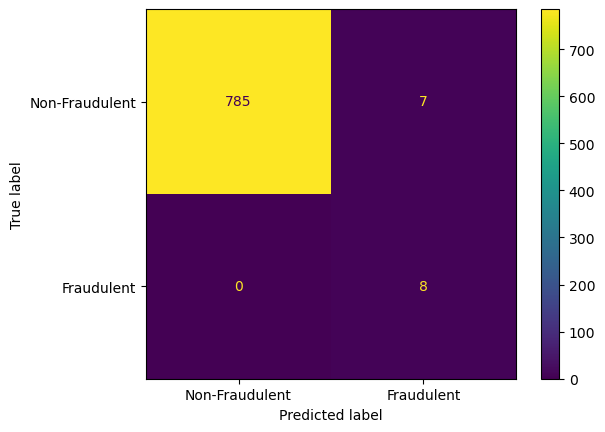

In [96]:
conf_mat=confusion_matrix(y_test, y_test_pred_brf)
print('Confusion Matrix :')
print(conf_mat)
cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Non-Fraudulent', 'Fraudulent'])
cm_display.plot()
plt.show()

So FP=0 their for FPR=0 also TP=8 is small. so due 0 value FPR instead of ploting ROC(FPR-TPR) curve we plot Precision-Recall curve

In [105]:
y_pred_prob=brf_classifier.predict_proba(x_test_sc)[:,1]
result=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred_brf,
    'Predicted_probability' : y_pred_prob
})
result.head()

,Actual,Predicted,Predicted_probability
1860,0,0,0.09
353,0,0,0.10
1333,0,0,0.10
905,0,0,0.01
1289,0,0,0.03


In [ ]:
# Precision Recall Curve